2.1.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 32) 

C:\Users\criti\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\criti\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\criti\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\criti\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\criti\anaconda3\envs\tf-gpu\lib\site-packages\PIL\TiffImagePlugin.py:7

50/50 [==============================] - 32s 644ms/step - loss: 0.9754 - accuracy: 0.4544 - val_loss: 0.9680 - val_accuracy: 0.4260
Epoch 2/30
50/50 [==============================] - 32s 646ms/step - loss: 0.8848 - accuracy: 0.4638 - val_loss: 0.9711 - val_accuracy: 0.5160
Epoch 3/30
50/50 [==============================] - 32s 630ms/step - loss: 0.8205 - accuracy: 0.5432 - val_loss: 0.9159 - val_accuracy: 0.4950
Epoch 4/30
50/50 [==============================] - 31s 626ms/step - loss: 0.7904 - accuracy: 0.5974 - val_loss: 0.8444 - val_accuracy: 0.5810
Epoch 5/30
50/50 [==============================] - 31s 624ms/step - loss: 0.7386 - accuracy: 0.6232 - val_loss: 0.7299 - val_accuracy: 0.6500
Epoch 6/30
50/50 [==============================] - 31s 623ms/step - loss: 0.7190 - accuracy: 0.6514 - val_loss: 0.7292 - val_accuracy: 0.6440
Epoch 7/30
50/50 [==============================] - 31s 626ms/step - loss: 0.6951 - accuracy: 0.6646 - val_loss: 0.7425 - val_accuracy: 0.6470
Epoch 8/30

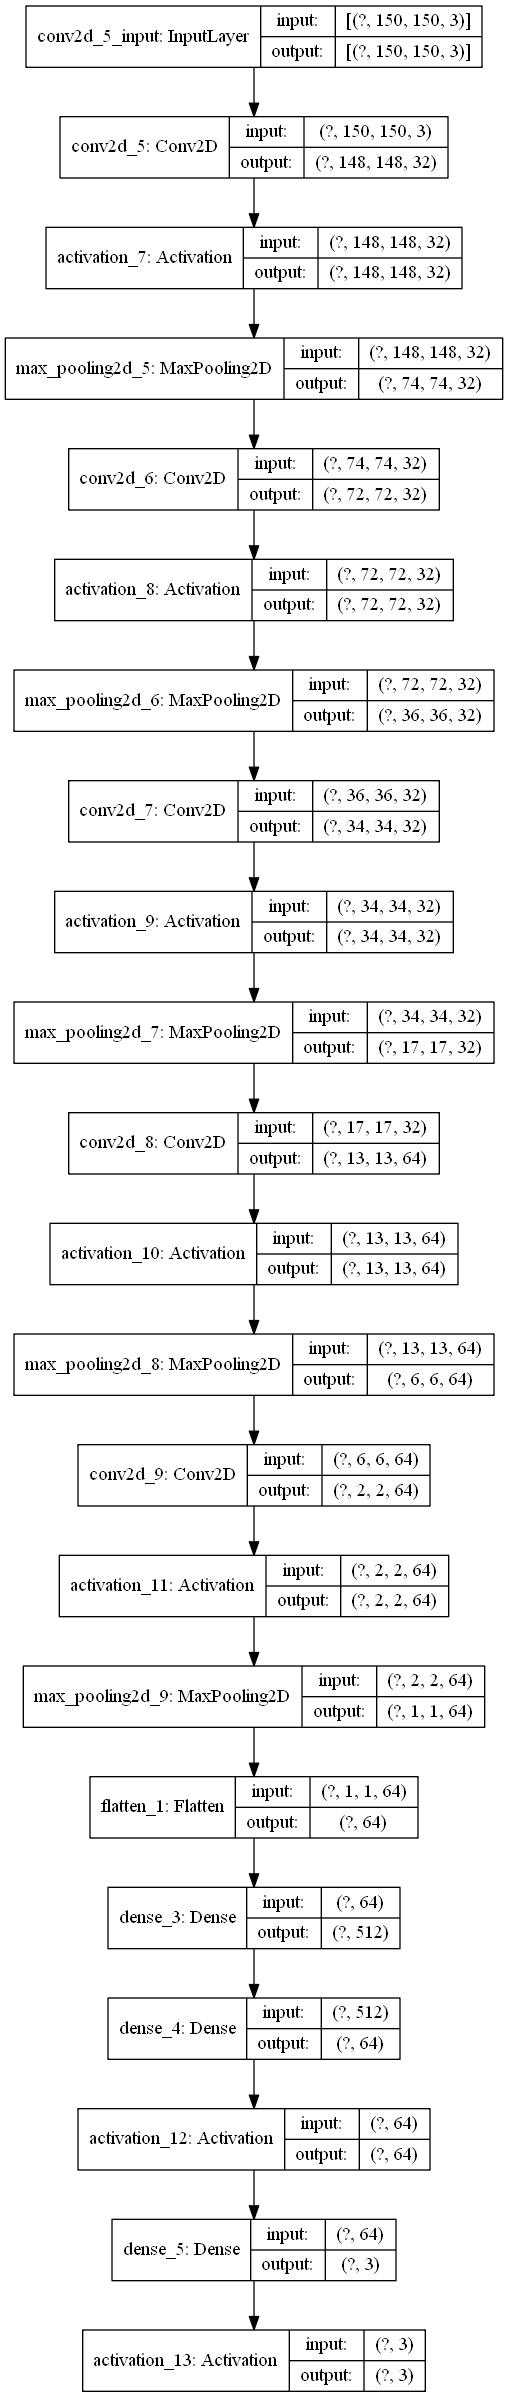

In [2]:
# using tf.2.1 in colab
# %tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2

# sanity check for the tf version
print(tf.__version__)

###################################################################################################
# Define image size for network model -- all input images are scaled to this size.
###################################################################################################   
img_width, img_height = 150, 150

###################################################################################################
# Include pointers to training and validation data folders -- be sure to examine subfolder structure
# --> I also define the # of training samples, validation samples, epochs, and batch size here.
###################################################################################################   
train_data_dir = './Datasets/data/train'
validation_data_dir = './Datasets/data/validation'
nb_train_samples = 5000
nb_validation_samples = 1000
epochs = 30
batch_size = 100

###################################################################################################
# As before, this code simply organizes input data such that channels either come first or last
# depending on the backend used (TensorFlow or Theano)
###################################################################################################   
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

###################################################################################################
# Define our CNN model
###################################################################################################
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

################################################
# INSERT YOUR CODE HERE
################################################
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

###################################################################################################
# To process images in respective directories, we can use the ImageDataGenerator class
#	The code provided here normalizes image data, etc.
#	The parameters will not be discussed further here, 
#    but more information / options can be found at:  https://keras.io/preprocessing/image/ 
###################################################################################################   
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

###################################################################################################
# This is the augmentation configuration we will use for testing:  only rescaling
###################################################################################################
test_datagen = ImageDataGenerator(rescale=1. / 255)

###################################################################################################
# Subsequent invocations of flow_from_directory() will use the paths to the training and validation 
# data, and generate batches of data
# 
# Note that if you wanted to work with grayscale images (for example) you could simply change 
# color_mode to ‘gray_scale’ (and the number of color channels)
# 
# Again, you will not need to change any parameters here, but a more detailed description of this 
# class can also be found at the link above.
###################################################################################################
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

###################################################################################################
# Finally, the invocation of model.fit_generator will simply train the model on batches of data.  
# More information can be found at:  https://keras.io/models/sequential/
# --> However, this is just analogous to model.fit() discussed in other examples.
###################################################################################################

history = model.fit(
    train_generator,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

import pandas as pd
hist_df = pd.DataFrame(history.history) 
hist_csv_file = './dogs_cats_birds_model_case04_30epoch.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

###################################################################################################
# Here, we save the model weights and generate an image of the network...
###################################################################################################
model.save('./dogs_cats_birds_model_case04_30epoch')

plot_model(model, to_file='./dogs_cats_birds_model_case04.png', show_shapes=True, show_layer_names=True)


In [3]:
print(tf.__version__)

2.1.0
